<a href="https://colab.research.google.com/github/Berk3459/USD-TRY-Exchange-prediction-ARIMA-MODEL/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
vs = yf.download("USDTRY=x",period="5y",interval="1mo")["Close"]
veri =pd.DataFrame(vs)
veri.head(3)

/tmp/ipython-input-1947621369.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vs = yf.download("USDTRY=x",period="5y",interval="1mo")["Close"]
[*********************100%***********************]  1 of 1 completed


Ticker,USDTRY=X
Date,
2020-10-01,8.29794
2020-11-01,7.81732
2020-12-01,7.37373


In [ ]:
df = veri[3:]
df.head(3)

Ticker,USDTRY=X
Date,
2021-01-01,7.3077
2021-02-01,7.3231
2021-03-01,8.3247


**Decomposing the dataset to identify if dataset have trend,seasonality or periodicity**

In [ ]:
from statsmodels.tsa.seasonal import STL

In [ ]:
decompose = STL(df).fit()

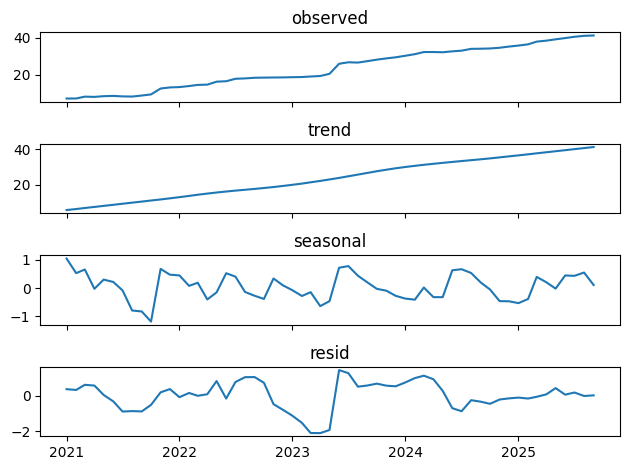

In [ ]:

fig,(ax1,ax2,ax3,ax4) = plt.subplots(nrows=4,ncols=1,sharex=True)
ax1.set_title("observed")
ax2.set_title("trend")
ax3.set_title("seasonal")
ax4.set_title("resid")
ax1.plot(decompose.observed)
ax2.plot(decompose.trend)
ax3.plot(decompose.seasonal)
ax4.plot(decompose.resid)
plt.tight_layout()

plt.show()

# **checking if dataset stationary**
we have to chech if data stationarity to implement ARMA model.Because stationarity is one of the assumption of ARMA model.

In [ ]:
from statsmodels.tsa.stattools import adfuller,kpss


In [ ]:
def Stationarity_test(df):
  adf_test = adfuller(df)
  kpss_test = kpss(df)
  print(f"adf p-value : {adf_test[1]} and kpss p-value {kpss_test[1]}")
  if adf_test[1] <= 0.05 and kpss_test[1] >0.05:
    print(f'Reject the null hypothesis: The time series is stationary. ')
  else:
    print('Fail to reject the null hypothesis: The time series is non-stationary.')

In [ ]:
Stationarity_test(df)

adf p-value : 0.9607099051933117 and kpss p-value 0.01
Fail to reject the null hypothesis: The time series is non-stationary.


/tmp/ipython-input-593328788.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df)


# Making the Dataset stationary
 we are going to compute the differences between consecutive observations to make dataset stationary


In [ ]:
df = df.diff()
df.dropna(inplace=True)
df.head(5)

Ticker,USDTRY=X
Date,
2021-06-01,-6.231399
2021-07-01,3.007855
2021-08-01,0.231704
2021-09-01,-0.975641
2021-10-01,-0.848578


In [ ]:
Stationarity_test(df)

adf p-value : 3.2194214488403057e-06 and kpss p-value 0.1
Reject the null hypothesis: The time series is stationary. 


/tmp/ipython-input-1186648419.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = kpss(df)


# ARIMA MODEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(df,order = (1,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:               USDTRY=X   No. Observations:                   52
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -125.847
Date:                Wed, 10 Sep 2025   AIC                            259.694
Time:                        10:18:54   BIC                            267.421
Sample:                    06-01-2021   HQIC                           262.647
                         - 09-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6753      0.062    -10.945      0.000      -0.796      -0.554
ma.L1         -1.9763    176.578     -0.011      0.991    -348.063     344.110
ma.L2          0.9999    178.701      0.006      0.9